 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = Path('Resources/whale_returns.csv')
whale_returns_df = pd.read_csv(whale_returns)
whale_returns_df.head(3)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()
whale_returns_df.head(3)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726


In [5]:
# Set Index to date
#set Date as df index, inferring datetime format
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True),inplace=True)

#drop extra date column
whale_returns_df.drop(columns=['Date'],inplace=True)

#check above
whale_returns_df.head(3)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns = Path('Resources/algo_returns.csv')
algo_returns_df = pd.read_csv(algo_returns)
algo_returns_df.head(3)

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN


In [7]:
# Count nulls
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()
algo_returns_df.head(3)

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668


In [9]:
# Set Index to date
#set Date as df index, inferring datetime format
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True),inplace=True)

#drop extra date column
algo_returns_df.drop(columns=['Date'],inplace=True)

#check above
algo_returns_df.head(3)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_close_prices = Path('Resources/sp500_history.csv')
sp500_close_df = pd.read_csv(sp500_close_prices)
sp500_close_df.head(3)

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03


In [11]:
# Check Data Types
sp500_close_df.dtypes

Date     object
Close    object
dtype: object

In [12]:
# Fix Data Types

#remove $ notation from Close, then cast Close asfloat
sp500_close_df['Close'] = sp500_close_df['Close'].str.replace('$','')
sp500_close_df['Close'] = sp500_close_df['Close'].astype('float')
sp500_close_df['Close']


C:\Users\giffo\AppData\Local\Temp\ipykernel_18076\3900962007.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_close_df['Close'] = sp500_close_df['Close'].str.replace('$','')


0       2933.68
1       2907.97
2       2905.03
3       2900.45
4       2907.06
         ...   
1644    1460.93
1645    1461.40
1646    1450.99
1647    1445.75
1648    1444.49
Name: Close, Length: 1649, dtype: float64

In [13]:
# Fix Data Types (contd)

#set Date as df index, inferring datetime format
sp500_close_df.set_index(pd.to_datetime(sp500_close_df['Date'], infer_datetime_format=True),inplace=True)

#drop extra date column
sp500_close_df.drop(columns=['Date'],inplace=True)

In [14]:
sp500_close_df.head(3)

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03


In [15]:
# Sort sp500Close dataframe in ascending order to ensure proper pct_change calc in next step 
sp500_close_df = sp500_close_df.sort_index(ascending=True)

# Calculate Daily Returns
sp500_returns_df = sp500_close_df.pct_change()
sp500_returns_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [16]:
# Drop nulls
sp500_returns_df = sp500_returns_df.dropna().copy()
sp500_returns_df.head(3)

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174


In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df.columns = ['S&P 500 Returns']
sp500_returns_df.head(3)

,S&P 500 Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns_df = pd.concat([whale_returns_df,algo_returns_df,sp500_returns_df],axis = 'columns',join = 'inner')
all_returns_df.head(3)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns for All Portfolios'}, xlabel='Date'>

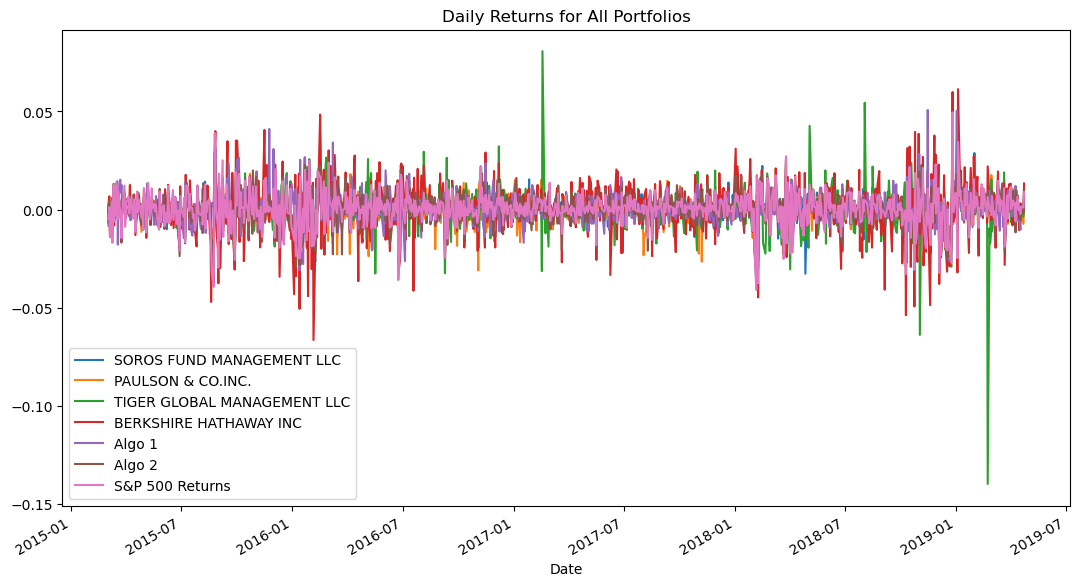

In [19]:
# Plot daily returns of all portfolios
all_returns_df.plot(title = 'Daily Returns for All Portfolios',figsize=(13,7))

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns for All Portfolios'}, xlabel='Date'>

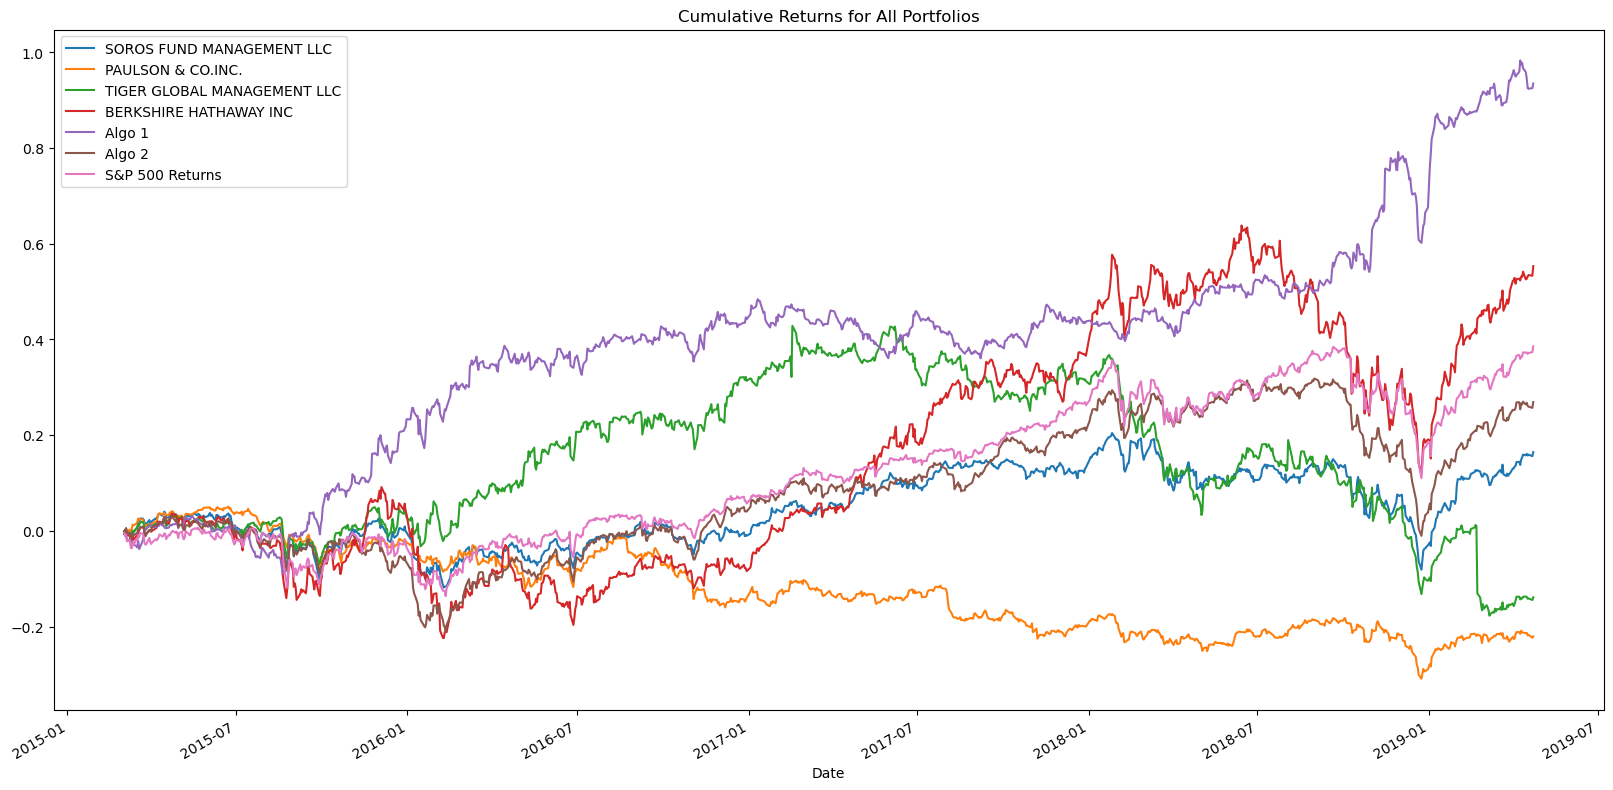

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df = (1 + all_returns_df).cumprod() - 1

# Plot cumulative returns
cumulative_returns_df.plot(figsize=(20,10), title=('Cumulative Returns for All Portfolios'))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

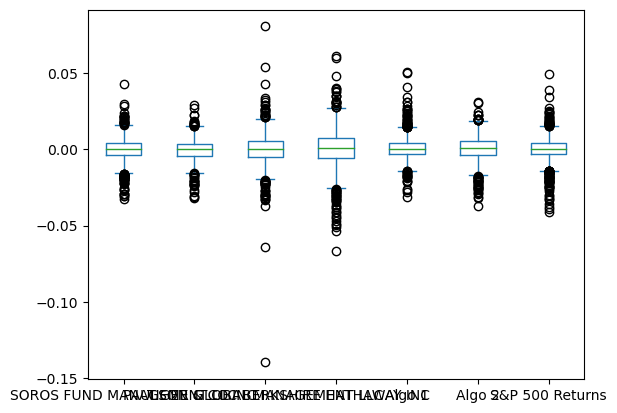

In [47]:
# Box plot to visually show risk
all_returns_df.plot(kind='box')

### Calculate Standard Deviations

In [142]:
# Calculate the daily standard deviations of all portfolios

# Create dataframe based on std calcs on the all_returns_df, set column name to StDev
portfolio_std_df = pd.DataFrame(all_returns_df.std(),columns=['StDev'])
#Rename index column to be descriptive
portfolio_std_df.index.name = 'Firm'
#Check
portfolio_std_df

,StDev
Firm,
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500 Returns,0.008554


### Determine which portfolios are riskier than the S&P 500

In [137]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = portfolio_std_df.loc['S&P 500 Returns']
sp500_std

# Determine which portfolios are riskier than the S&P 500
for Firm,StDev in portfolio_std_df.index:
    print('x')
    
    #    if i > sp500_std:
#        print(f'{std} StDev is higher than S&P 500')
#    else:
#        print(f'{std} StDev is lower than S&P 500')

ValueError: too many values to unpack (expected 2)

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!